**Group No 73**

Group Members
1.   Saurabh Arunrao Dhande - 2021fc04700
2.   Leo Sherin Jose - 2021fc04704
3.   Siddharth Vij - 2021fc04507


Assignment Dataset - Set 10 - Computer Hardware Performance

**Note**: There are multiple outputs that are used and displayed for analyis and modelling. Please read inference part of sections for detailed inferences and answers.

In [1]:
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

df_ip = pd.read_csv(r"machine.data", names=["vendor name", "Model", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"])

**Data Visualization and Exploration**: 

In [2]:
df_ip.head(2)

,vendor name,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253


In [3]:
df_ip.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vendor name,209,30,ibm,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,209,209,32/60,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MYCT,209.0,NaN,NaN,NaN,203.822967,260.262926,17.0,50.0,110.0,225.0,1500.0
MMIN,209.0,NaN,NaN,NaN,2867.980861,3878.742758,64.0,768.0,2000.0,4000.0,32000.0
MMAX,209.0,NaN,NaN,NaN,11796.15311,11726.564377,64.0,4000.0,8000.0,16000.0,64000.0
CACH,209.0,NaN,NaN,NaN,25.205742,40.628722,0.0,0.0,8.0,32.0,256.0
CHMIN,209.0,NaN,NaN,NaN,4.698565,6.816274,0.0,1.0,2.0,6.0,52.0
CHMAX,209.0,NaN,NaN,NaN,18.267943,25.997318,0.0,5.0,8.0,24.0,176.0
PRP,209.0,NaN,NaN,NaN,105.62201,160.830733,6.0,27.0,50.0,113.0,1150.0
ERP,209.0,NaN,NaN,NaN,99.330144,154.757102,15.0,28.0,45.0,101.0,1238.0


**Data Visualization and Exploration** : Class Imbalance, Skew Detection, Outlier Detection

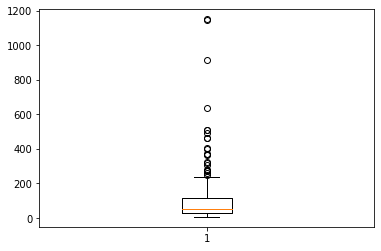

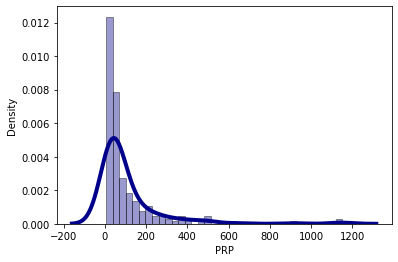

In [4]:
# Remove estimated values
df_filtered_ip = df_ip.drop(["ERP"], axis=1)

# Check distribution of target var
plt.boxplot(df_filtered_ip["PRP"])
plt.show()

# Check distribution of target var
sns.distplot(df_filtered_ip['PRP'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

# Inference:
# 1- Imbalance in PRP - As we can see in histogram, numerical variable PRP has imbalanced distribution with low number of hardwares having high val of PRP
# 2- Skew - As we observe in histogram and boxplot below, the target variable "PRP" is right (positive) skewed. The area from Q2 to Q3 and then to 
#    second whisker is wider than the area from first whisker to Q1 to Q2.
# 3- Outliers = As we can see in boxplot that the numerical target variable is widely distributed with many outliers. 

**Data Visualization and Exploration**

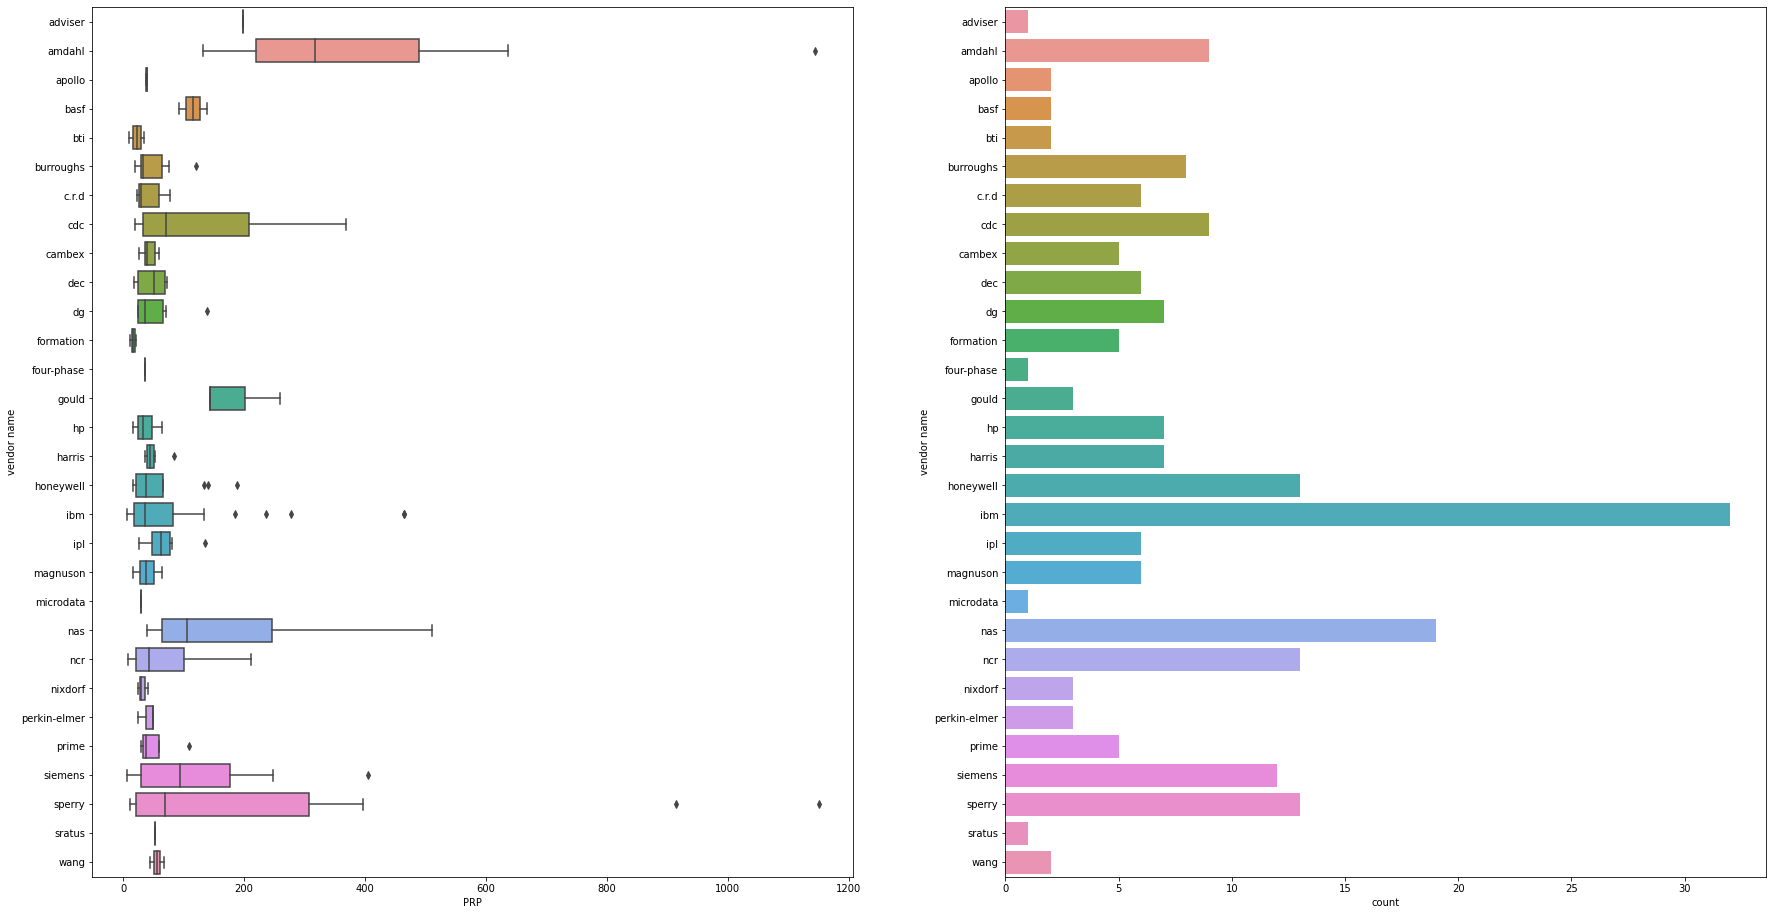

In [5]:
# Check if distribution varies w.r.t vendor. Also, check rows per vendor

fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (30, 16))
sns.boxplot(y=df_filtered_ip["vendor name"], x=df_filtered_ip["PRP"], ax = ax0)
sns.countplot(y ='vendor name',data = df_filtered_ip, ax=ax1)
fig.show()

# Inference:
# 1- The idea is to understand the distribution of data based on vendors. For example - Vendors -CDC, NAS and SPERRY has skewed distribution.

In [6]:
df_filtered_ip.groupby('vendor name').agg(['mean','min','max', 'count'])['PRP']

# Inference:
# Most of the vendors have less number of rows and IBM is an exception to this. 

,mean,min,max,count
vendor name,,,,
adviser,198.000000,198,198,1
amdahl,416.333333,132,1144,9
apollo,39.000000,38,40,2
basf,115.000000,92,138,2
bti,22.500000,10,35,2
burroughs,49.750000,19,120,8
c.r.d,42.666667,23,77,6
cambex,42.800000,26,60,5
cdc,130.111111,20,368,9


**Data Visualization and Exploration**: Understand correlation

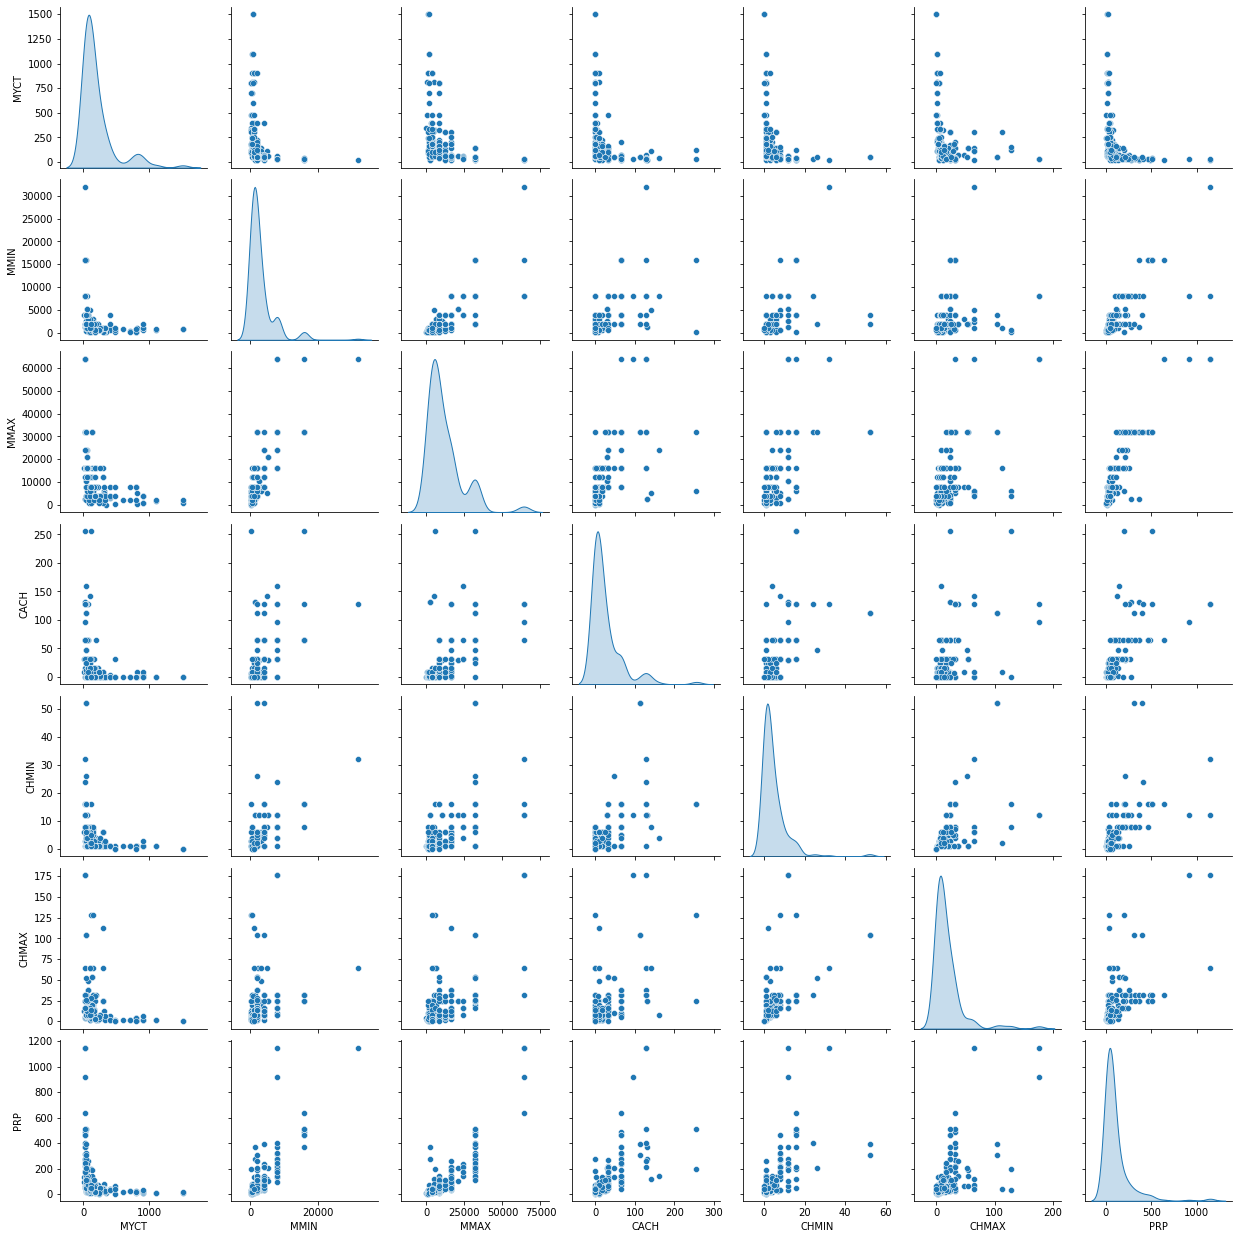

In [7]:
sns.pairplot(df_filtered_ip, diag_kind='kde')  # Check distribution & correlation amoung other numerical variables.

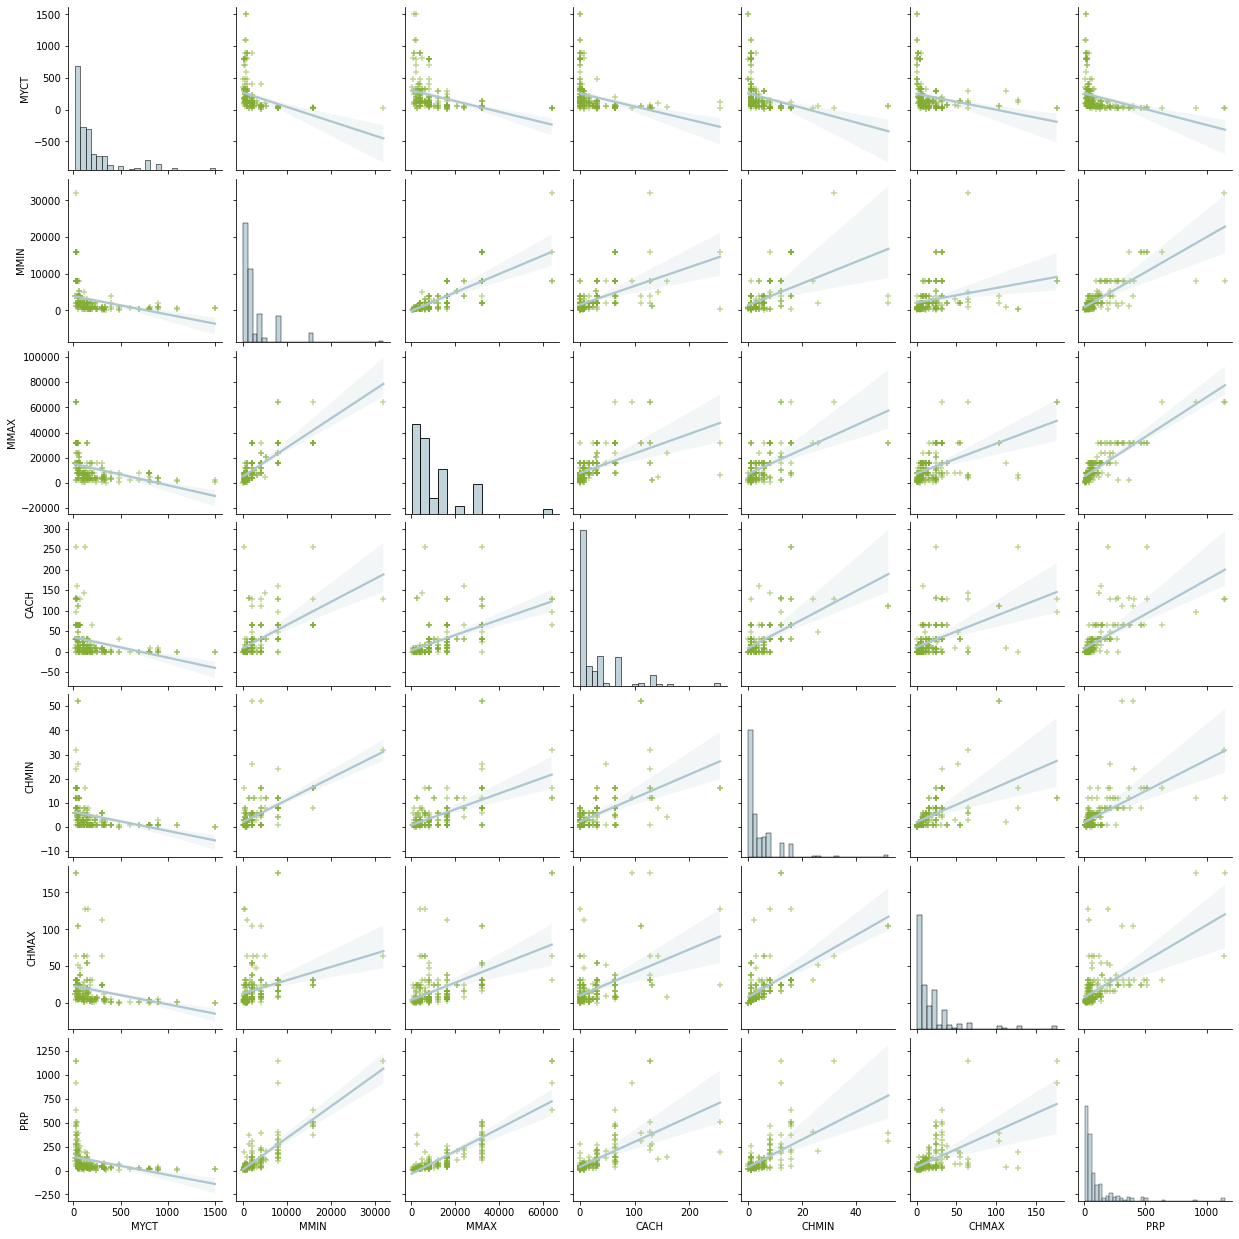

In [8]:
# Check distribution & correlation amoung other numerical variables.

sns.pairplot(df_filtered_ip, diag_kind='hist', kind='reg', diag_kws={'color': '#aec6cf'}, plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5, 'color': '#82ad32'}}, markers="+")

# Inference:
# 1- For most of the feature variables in dataset, the relationship with "PRP" is slightly linear. Exception is MYCT that has a exponential relation. 
# 2- Above situation of low linearity between PRP and predictor vars can be improved by taking transforms - log or box plot or any relevant transform.
# 3- We can see from KDE plot that the distribution of all numerical variables is right skewed. Hence, we will take log transform of numerical variables. 
#    We should also know that log transform can not be applied to a numerical variable having 0 or negative data.  

**Data Pre-processing and cleaning** : Handling Outliers

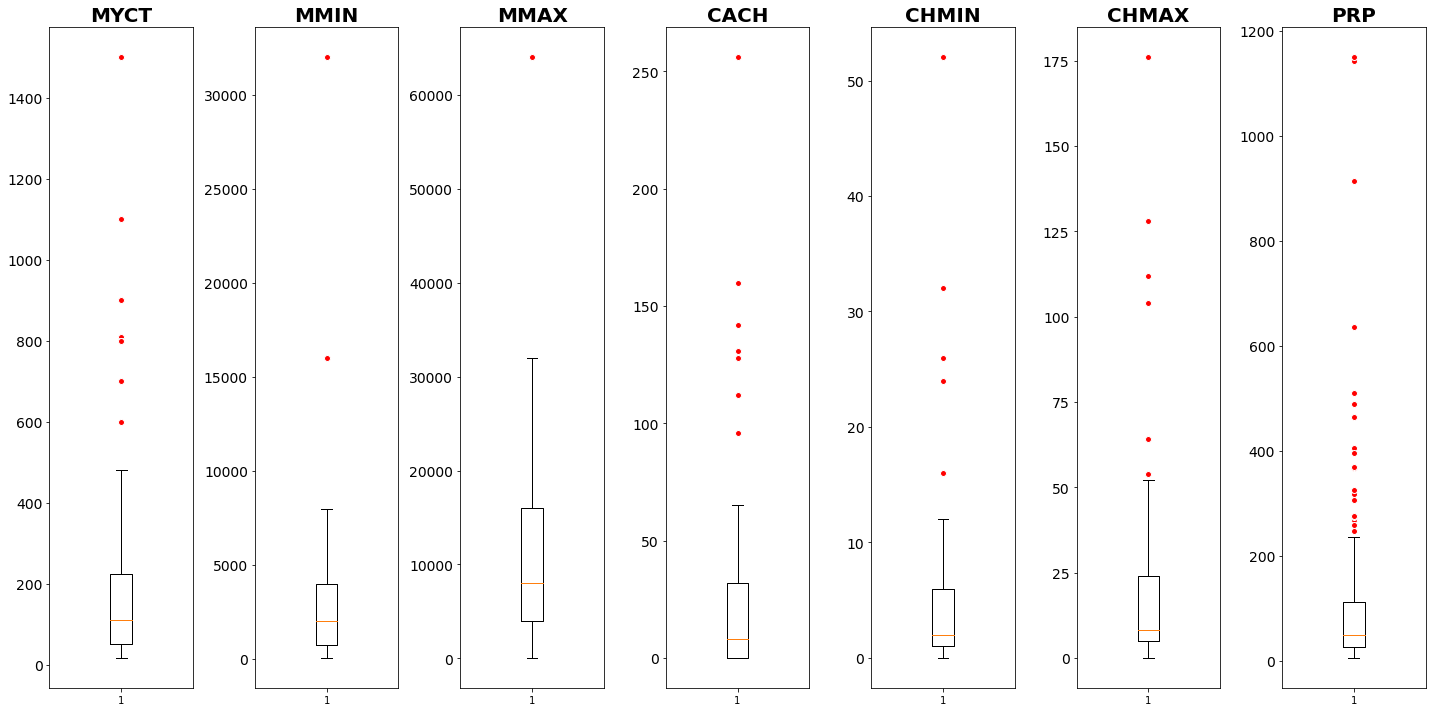

In [9]:
# check outliers for all the numerical variables.

def boxplot_all_cols_df(df):
  #Creating subplot of each column with its own scale
  red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

  fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

  for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
      
  plt.tight_layout()


df_filtered_numerical_ip = df_filtered_ip[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP"]]
boxplot_all_cols_df(df_filtered_numerical_ip)

# Inference:
# 1- There are outliers in all variables except MMIN and MMAX that have just 2 and 1 outliers respectively. 
# 2- These outliers will get suppressed during transformation.

**Data Pre-processing and cleaning** : Correlation and Removing Correlated Variables

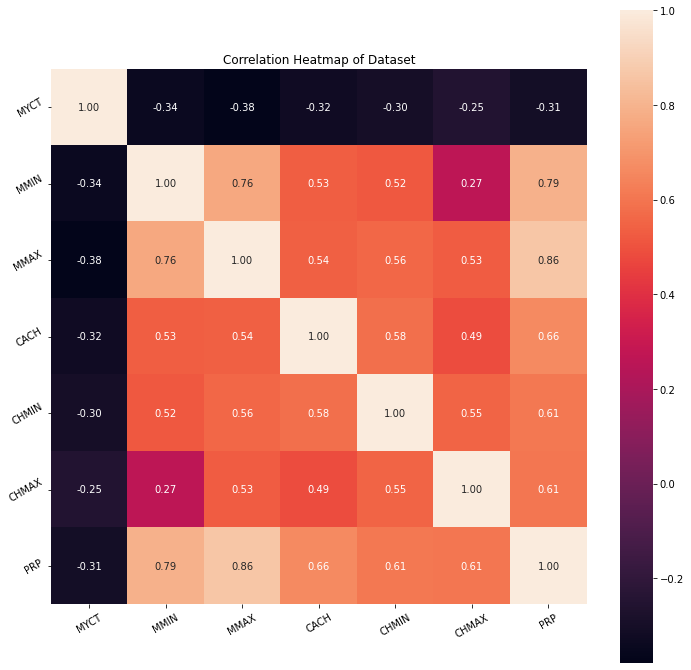

In [10]:
# correlation analysis for numerical attributes
corr_matrix = df_filtered_ip.corr()

# Create correlation heatmap
plt.figure(figsize=(12,12))
plt.title('Correlation Heatmap of Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

# Inference:
# 1- From correlation heatmap, we can see that correlation bw MMIN and MMAX is moderately high (0.76 coefficient) in positive direction. Hence, We can reduce
#    one of these variables. We plan to reduce MMIN because MMAX has comparetively stronger relation (0.86 coefficient) with target PRP.
# 2- Other important point to note is that MMAX has the strongest relation (0.86 coefficient) with target variable PRP. Hence, this is a crucial variable for
#    further analysis. 
# 3- Also variable MYCT has weak negative correlation with rest of the numerical variables. 

In [11]:
df_filtered_ip = df_filtered_ip.drop(["MMIN"], axis=1)  # Dropped MMIN as a result of correlation analysis from previous command.
df_filtered_ip = df_filtered_ip.drop(["vendor name", "Model"],axis=1)  # Removing columns not useful for algorithm.

**Data Pre-processing and cleaning** : Log Transform for handling outliers and removal of skew. Also, checking for 0 in dataset.

In [12]:
# 1- 0 values - by looking at data manually, we know that cache, chmin and chmax are the ones that have 0 values. 
# 2- Log1p function that automatically adds 1 before log so 0 in data should not be an issue. Note that log is undefined for 0 values.
# 3- Also, taking a log transform will take care of outliers up to a certain extent - this is verified in next cell.

import numpy as np
from scipy.stats import skew, probplot
from scipy.stats import boxcox

y = df_filtered_ip["PRP"]
y_log = np.log1p(y) 
X = df_filtered_ip.drop(["PRP"], axis=1)


# Verify once again the skewness in data - only numerical fields - Actually, we have already removed categorical fields. So this wont be a problem.
# Log transform of the skewed numerical features to lessen impact of outliers
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
def skew_verification(df, transform_type):
  skewness = df.apply(lambda x: skew(x))
  skewness = skewness[abs(skewness) > 0.5]
  skewed_features = skewness.index
  lam_dict = {}
  if transform_type == "log":
    df[skewed_features] = np.log1p(df[skewed_features])
  elif transform_type == "boxcox":
    for feature in skewed_features:
      df[feature], lam_dict[feature] = boxcox(df[feature])
  elif transform_type == "yeo-johnson":
    df[skewed_features] = power.fit_transform(df[skewed_features])
  else:
    print("unknown transform type")
  return df, lam_dict


X_log, _ = skew_verification(X.copy(deep=True), "log")

In [13]:
# Verify skewness of the transformed data.
def verify_skew_via_val_and_via_pairplot(X, y):
  X_temp = X.copy(deep=True)
  X_temp["PRP"] = y
  skewness = X_temp.apply(lambda x: skew(x))
  print("skewness of cols is shown below.\n", skewness)
  return X_temp


X_temp = verify_skew_via_val_and_via_pairplot(X_log, y_log)

skewness of cols is shown below.
 MYCT     0.412309
MMAX    -0.609257
CACH     0.042279
CHMIN    0.796847
CHMAX    0.135040
PRP      0.566133
dtype: float64


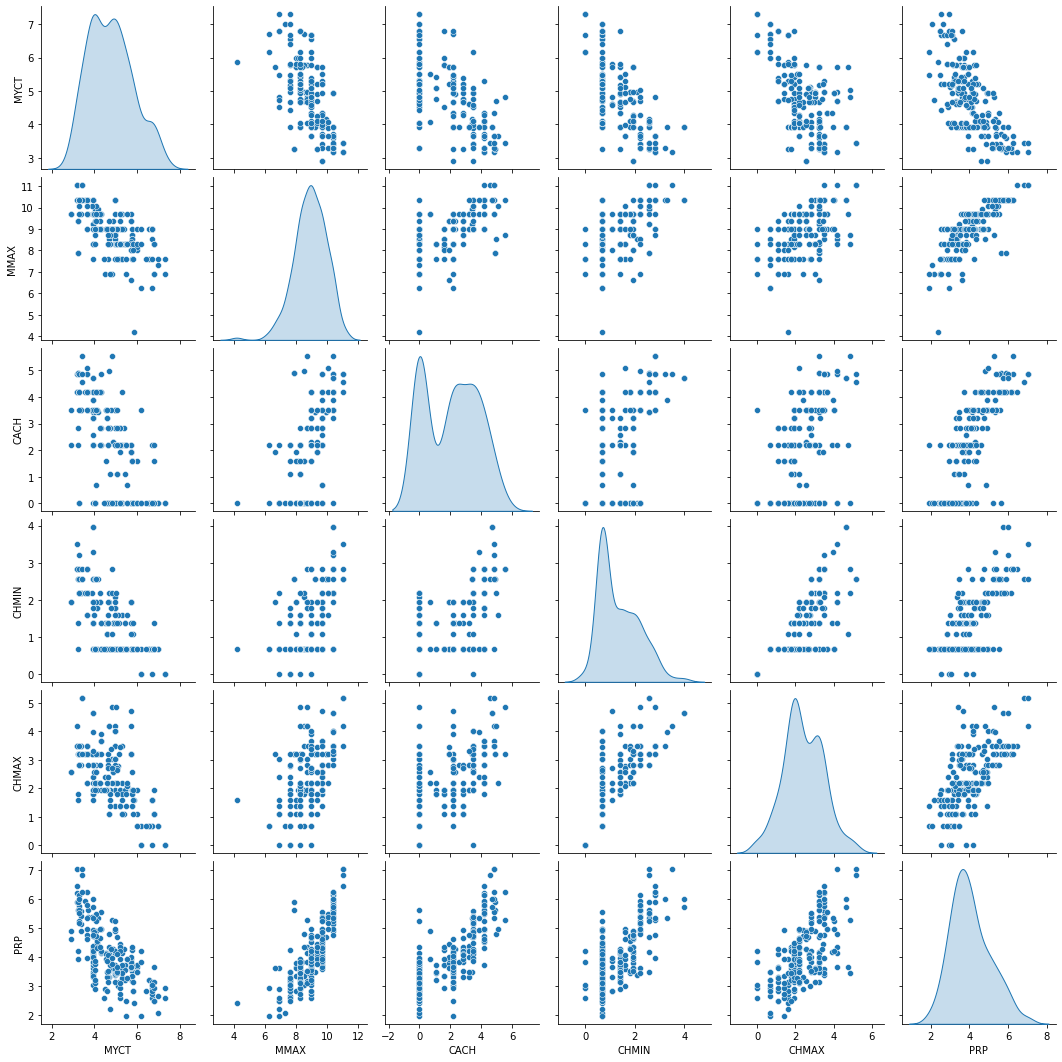

In [14]:
sns.pairplot(X_temp, diag_kind='kde')  # SNS plot

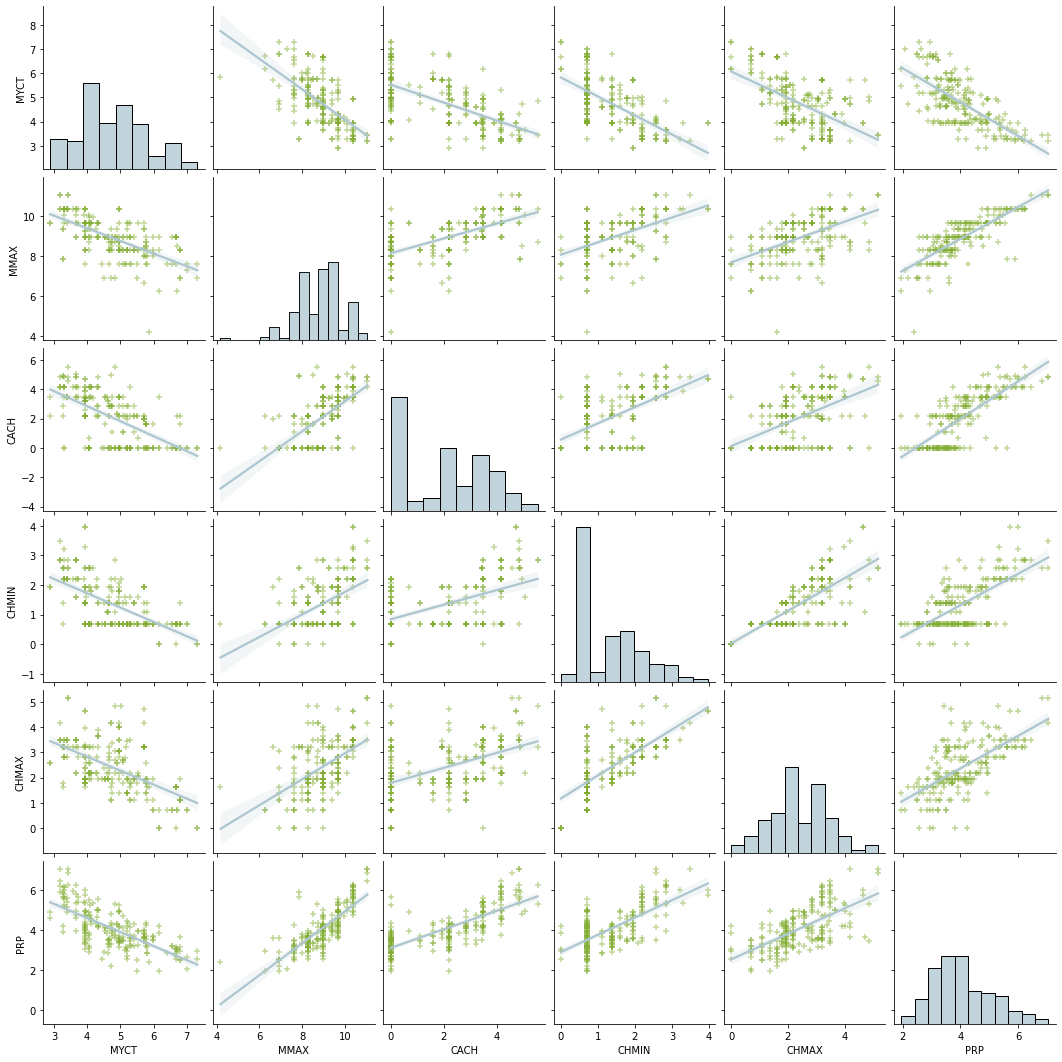

In [15]:
# SNS plot with regression line 

sns.pairplot(X_temp, diag_kind='hist', kind='reg', diag_kws={'color': '#aec6cf'}, plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5, 'color': '#82ad32'}}, markers="+")  

# Inference:
# 1- Skewness is still there heavily (skew > 0.5) in log transformed data. Let's now see condition of outliers in log transformed data.

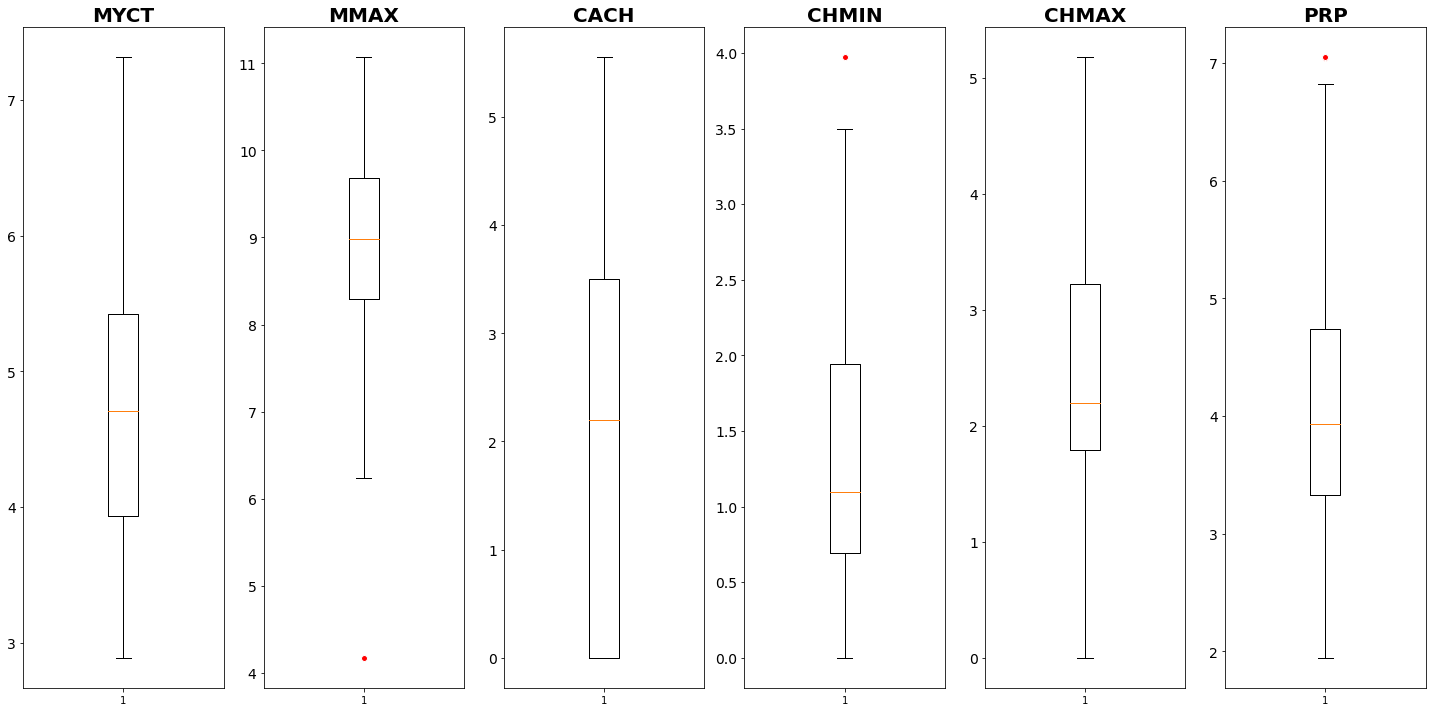

In [16]:
boxplot_all_cols_df(X_temp)

# Inference:
# 1- outliers have reduced significantly by log transformation except probably 1 outlier present in CHMIN and PRP which can be ignored.
# 2- We can also infer that skewness is still there specially in CHMIN and PRP variables. This was also evident in skewness printed in previous cell.
# 3- Let's box cox transformation to see if it does better job at reducing skewness than log transform.

**Data Pre-processing and cleaning** : Boxplot Transform for handling outliers and removal of skew. 

In [17]:
# Steps - Check skewness > transform > check skewness > check pair plot > check box plot/QQ plot for outliers

y_boxcox, y_lam_boxcox = boxcox(y)

try:
  X_boxcox, features_lam_boxcox = skew_verification(X.copy(deep=True), "boxcox")
except ValueError:
  print("Boxcox does not work on 0 or negative data. Boxcox1p requires additional input parameter. Hence, we skip this transform")

Boxcox does not work on 0 or negative data. Boxcox1p requires additional input parameter. Hence, we skip this transform


**Data Pre-processing and cleaning** : Power Transform for handling outliers and removal of skew. 

In [18]:
# Steps - Check skewness > transform > check skewness > check pair plot > check box plot/QQ plot for outliers

from sklearn.preprocessing import PowerTransformer

power = PowerTransformer(method='yeo-johnson', standardize=False)

y_power = power.fit_transform((y.to_numpy()).reshape((len(y.to_numpy()),1)))  
y_power = pd.Series([j for i in y_power for j in i])  # convert y back to series.

X_power = skew_verification(X.copy(deep=True), "yeo-johnson")
X_power = X_power[0]  # convert X back to DF

# In case box cox gives exception try the yeo-johnson power transform
X_temp = verify_skew_via_val_and_via_pairplot(X_power, y_power)

skewness of cols is shown below.
 MYCT     0.052614
MMAX     0.006766
CACH     0.013291
CHMIN    0.136254
CHMAX    0.001628
PRP      0.030931
dtype: float64


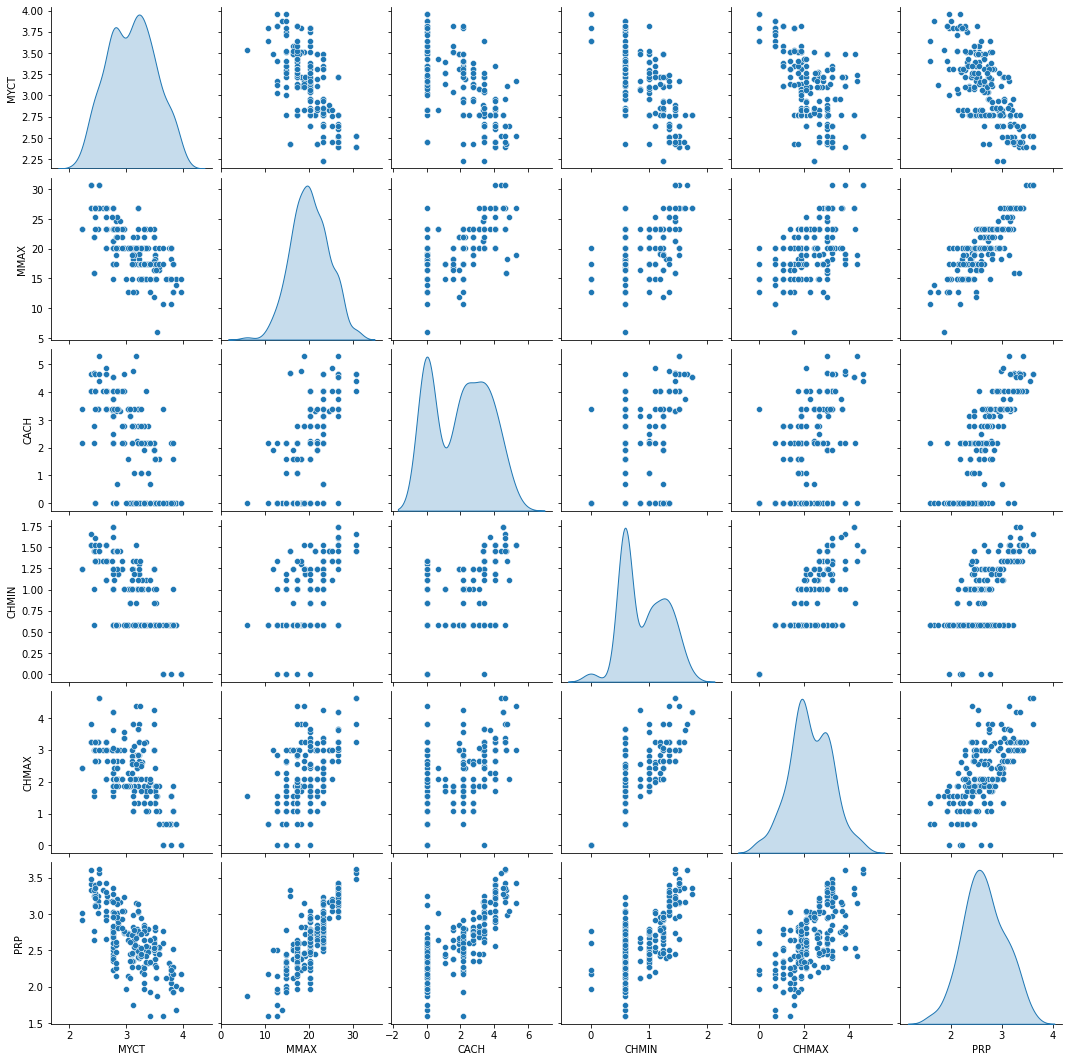

In [19]:
sns.pairplot(X_temp, diag_kind='kde')  # SNS plot

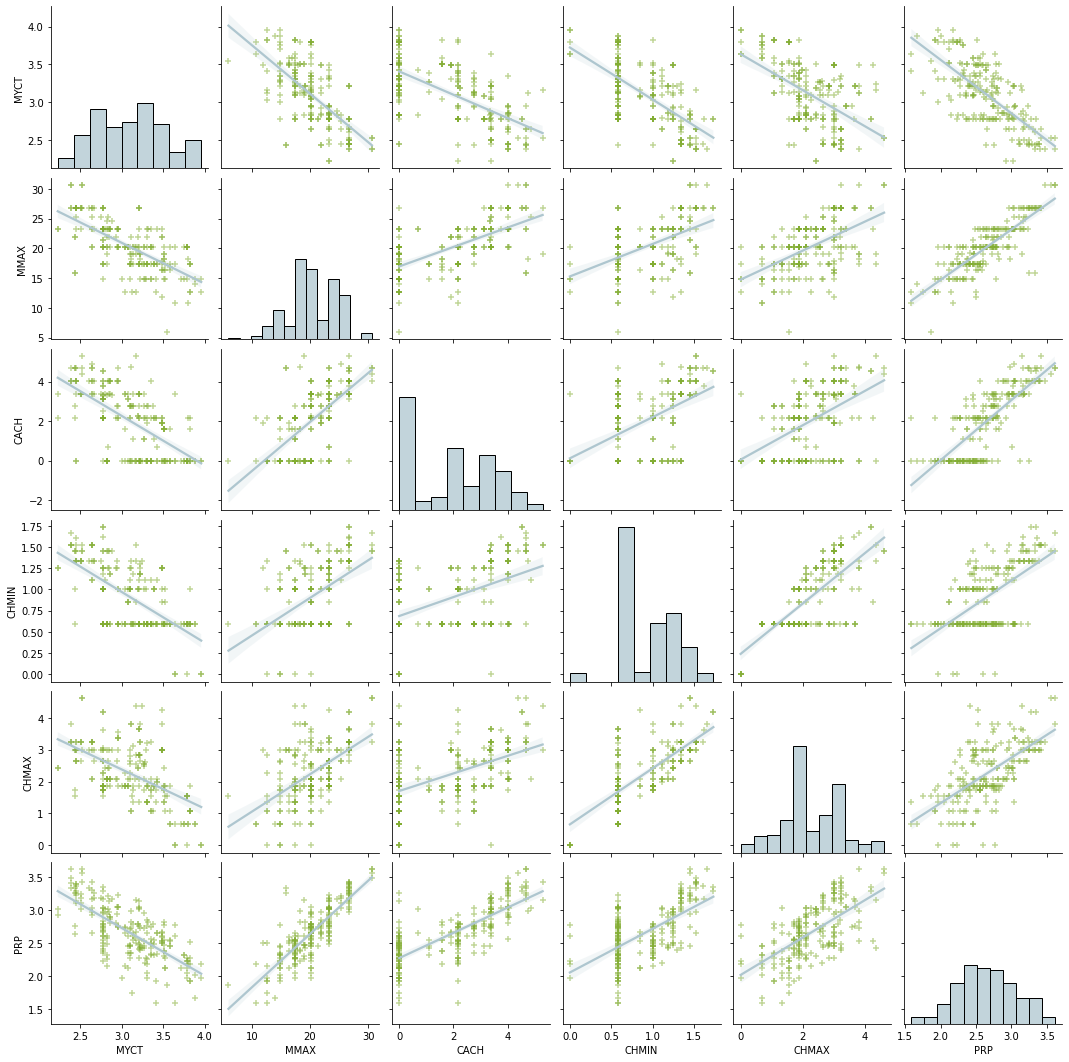

In [20]:
# SNS plot with regression line 

sns.pairplot(X_temp, diag_kind='hist', kind='reg', diag_kws={'color': '#aec6cf'}, plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5, 'color': '#82ad32'}}, markers="+")  

# Inference:
# 1- Skewness is very less; although i still see the distribution is not normal for half of the variables. 
# 2- Note that normal distribution is not required 
# 3- Let's now see condition of outliers in power transformed data.

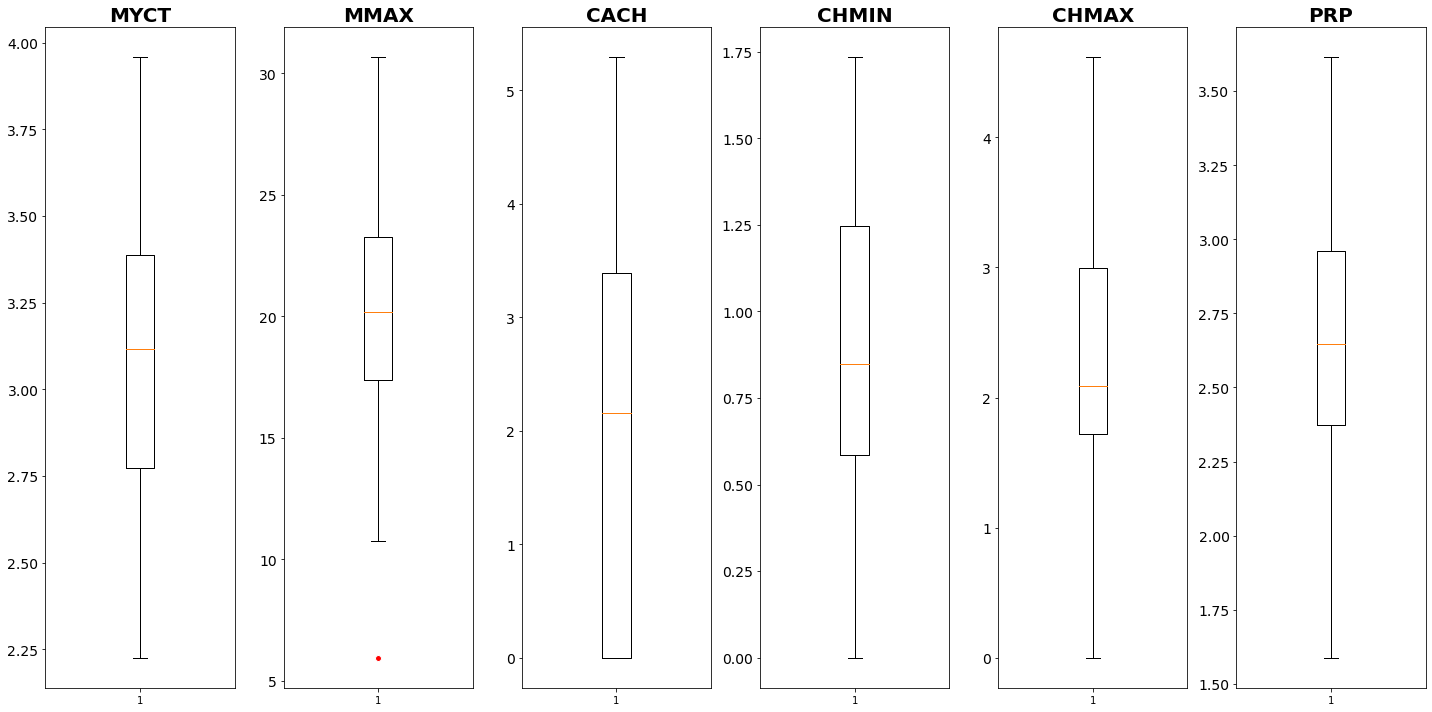

In [21]:
boxplot_all_cols_df(X_temp)

# Inference:
# outliers have reduced significantly by power transformation. Distribution is not normal for most of the features. Let's live with it for now.
# The selected transformation is Power transform - yeo-johnson.

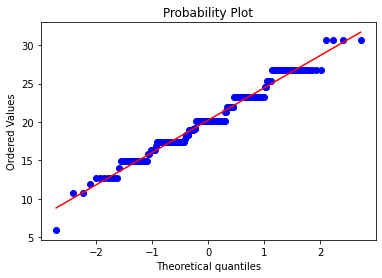

In [22]:
# QQ plot of variables done one after another

probplot(X_temp["MMAX"], dist="norm", plot=plt)  # Tried same plot for other parameters as well. 
plt.show()

**Data Pre-processing and cleaning** : Feature Reduction using PCA

In [23]:
## PCA for feature reduction

from sklearn.decomposition import PCA

def PCA_verify_component_importance(df):
  pca = PCA().fit(df)  # X_power
  explained_variance = pca.explained_variance_  
  explained_variance_ratio = pca.explained_variance_ratio_
  Cumulative_explained_variance=np.cumsum(pca.explained_variance_ratio_)
  print("eigen vals are {} and \n ratios are {} and \n cumulative ratios are {}".format(str(explained_variance), str(explained_variance_ratio), str(Cumulative_explained_variance)))
  return explained_variance, explained_variance_ratio, Cumulative_explained_variance


explained_variance, explained_variance_ratio, Cumulative_explained_variance = PCA_verify_component_importance(X_power)

eigen vals are [19.49279732  1.56168818  0.60249564  0.09351271  0.04302271] and 
 ratios are [0.89443102 0.07165838 0.02764564 0.00429085 0.00197411] and 
 cumulative ratios are [0.89443102 0.96608941 0.99373504 0.99802589 1.        ]


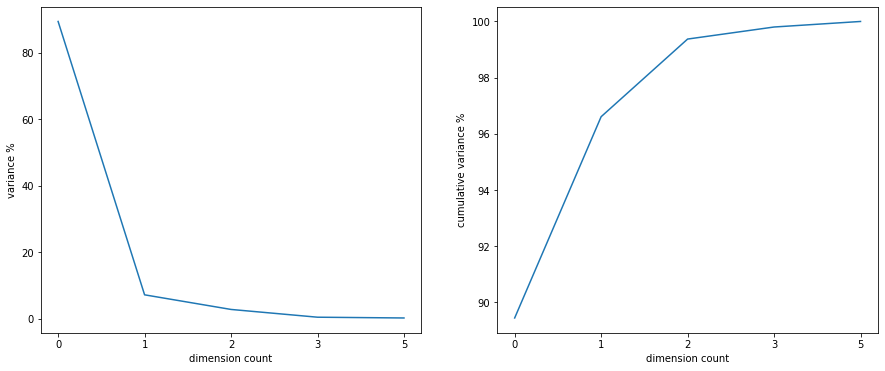

In [24]:
def plot_PCA_op_variance(explained_variance_ratio, Cumulative_explained_variance):
  fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (15, 6))
  ax0.plot(np.asarray([0,1,2,3,5]).astype(str), explained_variance_ratio*100)
  ax1.plot(np.asarray([0,1,2,3,5]).astype(str), Cumulative_explained_variance*100)
  ax0.set(xlabel="dimension count",ylabel="variance %")
  ax1.set(xlabel="dimension count",ylabel="cumulative variance %")
  fig.show()


plot_PCA_op_variance(explained_variance_ratio, Cumulative_explained_variance)

# Inference:
# We will use 3 criteria to choose the number of components we will be keeping. 
# 1/ Kaiser criterion: We drop all the components with an eigen value under 1.0 so we keep the first 2 components
# 2/ Elbow method: By identifying a point at which the proportion of variance explained by each subsequent principal component drops off we keep the first component
# 3/ Cumulative explained variance: We notice that the cumulative explained variance of the first component is 89.4%; therefore keep the first component
# As an outcome of these 3 ideas, we keep the first component only. (reject the kaiser criterion)

eigen vals are [3.34693485 0.69665663 0.3891545  0.36734986 0.22394263] and 
 ratios are [0.66618416 0.13866467 0.0774585  0.07311844 0.04457423] and 
 cumulative ratios are [0.66618416 0.80484883 0.88230733 0.95542577 1.        ]


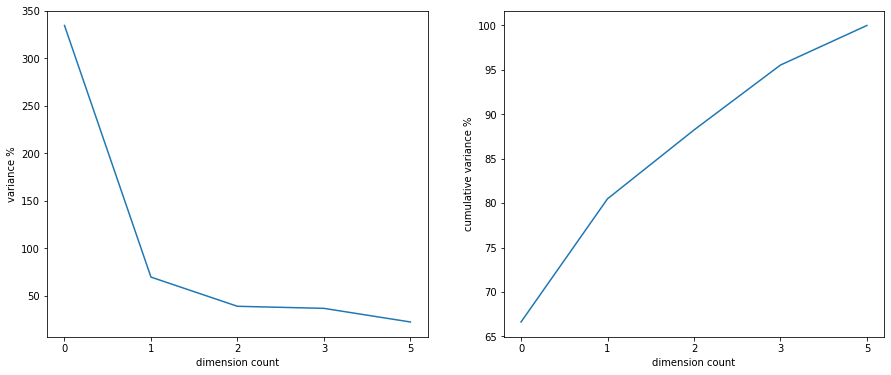

In [25]:
# PCA - We forgot one thing. We need to standardize data before using PCA. This may not have affected our dataset much because we have already used
# a transformation (log/power) to reduce the skewness of data and make the distribution more normal. In this process, the scale of all variables have 
# already dropped down. Still, Let's get them to exact same scale via standardization process and then use PCA to see how many components are taken forward

from sklearn.preprocessing import StandardScaler

cols = X_power.columns
X_transform_std = pd.DataFrame(StandardScaler().fit_transform(X_power), columns=cols)  # we also tried X_log here. That also, gives similar values.
explained_variance, explained_variance_ratio, Cumulative_explained_variance  = PCA_verify_component_importance(X_transform_std)
plot_PCA_op_variance(explained_variance, Cumulative_explained_variance)

# Inferences:
# We will use 3 criteria to choose the number of components we will be keeping. 
# 1/ Kaiser criterion: We drop all the components with an eigen value under 1.0 so we keep the first component
# 2/ Elbow method: By identifying a point at which the proportion of variance explained by each subsequent principal component drops off we keep the first(Not sure)
# 3/ Cumulative explained variance: We notice that the cumulative explained variance of the first component is 66.6% and second is 13%; therefore keep the 2 component
# As an outcome of these 3 ideas, we keep the first 2 components since we feel criteria 3 is important. first 2 PC hold major percentage.

# Standardization is important - We conclude that standardization is important. This is because only using power/log transform without standardization was 
# was leading to neglection of the second variable. In power transform, first component had a ratio of 89% and was overpowering rest of features.

**Model Building** : Model 1 using PCA

In [26]:
# MODEL 1- USING PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

def preperation(training_percent, X, y):
  # Note that we had transformed and standardized X and y while exploration but during model, we should not use the transformed value for splitting.
  # We should split on base values and then fit on train followed by transform on train and test. This is done to prevent data leakage.
  X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,train_size = training_percent,random_state=100)

  power.fit(X_train1) 
  X_train1_transformed = power.transform(X_train1)
  X_train1_transformed = pd.DataFrame(X_train1_transformed, columns=X_train1.columns) # convert back to DF
  X_test1_transformed = power.transform(X_test1)
  X_test1_transformed = pd.DataFrame(X_test1_transformed, columns=X_test1.columns) # convert back to DF  

  std_scalar = StandardScaler()
  std_scalar.fit(X_train1_transformed)
  X_train1_transformed_std = std_scalar.transform(X_train1_transformed)
  X_test1_transformed_std = std_scalar.transform(X_test1_transformed)
  X_train1_transformed_std = pd.DataFrame(X_train1_transformed_std, columns=cols)
  X_test1_transformed_std = pd.DataFrame(X_test1_transformed_std, columns=cols)

  y_train1_updated_for_power_func = (y_train1.to_numpy()).reshape((len(y_train1.to_numpy()),1))  # transforming for power function
  y_test1_updated_for_power_func = (y_test1.to_numpy()).reshape((len(y_test1.to_numpy()),1))  # transforming for power function
  power.fit(y_train1_updated_for_power_func) 
  y_train1_transformed = power.transform(y_train1_updated_for_power_func)
  y_test1_transformed = power.transform(y_test1_updated_for_power_func)
  y_train1_transformed = pd.Series([j for i in y_train1_transformed for j in i])  # convert y back to series.
  y_test1_transformed = pd.Series([j for i in y_test1_transformed for j in i])  # convert y back to series.

  y_train1_transformed_reshaped = y_train1_transformed.values.reshape(-1,1)  # reshaped because OLS requires input in this format.
  # y_test1_transformed_reshaped = y_test1_transformed.values.reshape(-1,1)  # maybe useful in OLS. will be removed if of no use.
  return X_train1_transformed_std, X_test1_transformed_std, y_train1_transformed_reshaped, y_train1_transformed, y_test1_transformed

X_train1_transformed_std, X_test1_transformed_std, y_train1_transformed_reshaped, y_train1_transformed, y_test1_transformed = preperation(0.8, X, y)

pca=PCA(n_components=2)  # We increased the components to 4 and got 79% score.
pca.fit(X_train1_transformed_std)
X_train1_transformed_std_pca = pca.transform(X_train1_transformed_std)  # fit and transform
X_train1_transformed_std_pca = pd.DataFrame(X_train1_transformed_std_pca, columns=['PCA1', 'PCA2'])
X_test1_transformed_std_pca = pca.transform(X_test1_transformed_std)  # no fitting. only transform
X_test1_transformed_std_pca = pd.DataFrame(X_test1_transformed_std_pca, columns=['PCA1', 'PCA2'])


def modelling(X_train, X_test, y_train, y_test):
  lr = LinearRegression()
  model = lr.fit(X_train,y_train)
  print(model.score(X_test,y_test))

# modelling(X_train1_transformed_std_pca,X_test1_transformed_std_pca, y_train1_transformed_reshaped, y_test1_transformed)  # Better to use Stats models because of detailed summary report. Hence, commenting this out.


def modelling_ols(X_train, X_test, y_train, y_test):
    X_train = sm.add_constant(X_train)
    model_ols = sm.OLS(y_train, X_train).fit()
    print(model_ols.summary())
    return model_ols

modelling_ols(X_train1_transformed_std_pca,X_test1_transformed_std_pca, y_train1_transformed_reshaped, y_test1_transformed)

# Interpretation of OLS summary output
# 1- R-squared is close to 1 (0.799). R-squared is SSR/(SSR+SSE). If it is close to 1, it means that SSE is close 0 and the model can be explained coefficients
# 2- Adj R-sq is close to R-square which means that there is no additional unwanted feature. Adj R^2 can be explained by keeping value of R^2 const in formula of Adj R^2.
# 3- F-statistic is SSR/SSE which shows strength of your model. The P value of F stat is lower than 0.05 and hence, the model is significient. It is a hypothesis test with H0 = all coefficents are 0 and H1 = atleast 1 is non-zero(model is good). It tests usefulness of all coeff together.
# 4- t value of PCA1 and PCA2 is calculated by coef/std err and the P value of T stat is lower than 0.05 and hence, all the coeff are useful in model. It is a hypothesis test with H0 = coef_1 is 0 and H1 = coef_1 is non zero. It tests usefulness of coef.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     325.6
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           7.77e-58
Time:                        12:42:35   Log-Likelihood:                 60.294
No. Observations:                 167   AIC:                            -114.6
Df Residuals:                     164   BIC:                            -105.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5816      0.013    196.043      0.0

**Data Pre-processing and cleaning** : Feature Reduction using RFE

In [27]:
# MODEL 2a- USING RFE

# RFE Recursive Feature Elimination - We also try eliminating features via RFE. Normally, RFE is used where number of features are large. Here we have used
# to see what effect it has on small number of features. In RFE, we first used RFE to find n most important features and build model and check VIF using n
# features. In next iteration, we check VIF and P value (output of model) and decide which feature we need to drop next. These iterations continue till the
# time we get P value and VIF under limits (0.05 for P val and 5 for VIF)

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Below statement is already defined in previous cell.Here, we are keeping transformed version of X since RFE requires standard version
# X_train1,X_test1,y_train1,y_test1 = train_test_split(X_transform_std,y_power,train_size = 0.8,random_state=100)

# Running rfe from sklearn 
def rfe_func(X, y, no_features_to_select):
  lr = LinearRegression()
  rfe = RFE(lr, n_features_to_select=no_features_to_select)  # we will reduce this number from 4 to 3 and then 2 and so on based on output of OLS and VIF.
  rfe = rfe.fit(X_transform_std, y_power)
  return rfe


# Lets take X_transform_std, y_power - that means non splitted versions of X and y. This is because we are only analyzing the cols required and are not fitting anything yet.
rfe = rfe_func(X_transform_std, y_power, 4)  
print("Result from RFE in the form of (col_name, selected,  rank_selection)is given as {}".format(list(zip(X_transform_std.columns,rfe.support_,rfe.ranking_)) ))
selected_features = list(X_transform_std.columns[rfe.support_])

X_train1_rfe = X_train1_transformed_std[selected_features]  # X_train1[selected_features]
X_test1_rfe = X_test1_transformed_std[selected_features]  # X_test1[selected_features]


# Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(X_train, X_test, y_train, y_test):
    df = X_train
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

Result from RFE in the form of (col_name, selected,  rank_selection)is given as [('MYCT', True, 1), ('MMAX', True, 1), ('CACH', True, 1), ('CHMIN', False, 2), ('CHMAX', True, 1)]


**Model Building** : Model 2a using RFE

In [28]:
# Model 2a

y_train1_reshaped_rfe = y_train1_transformed_reshaped
y_test1_rfe = y_test1_transformed

model_ols_2a = (modelling_ols(X_train1_rfe,X_test1_rfe, y_train1_reshaped_rfe, y_test1_rfe))
get_vif(X_train1_rfe,X_test1_rfe, y_train1_reshaped_rfe, y_test1_rfe)

# Interpretation of output
# 1- Rsq close to 1 indicates that model can be explained by coefficients. 
# 2- Adj Rsq close to Rsq indicates there is no unwanted feature in input.
# 3- Coef of MYCT is negative indicating negative linear relation with dep var.
# 4- P value for T stat is greater than 0.05 for MYCT indicating that coeff are not that useful for model.
# 5- P value of F stat is lower than 0.05 indicating that overall all coeff are useful for model.
# 6- VIF shows values less than 5 indicating that overall none of the variables can be explained from each other. Features are linearly independent.

# Summary - Based on point 4, we can remove MYCT. 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     173.5
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           1.83e-57
Time:                        12:42:35   Log-Likelihood:                 65.396
No. Observations:                 167   AIC:                            -120.8
Df Residuals:                     162   BIC:                            -105.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5816      0.013    200.888      0.0

In [29]:
# MODEL 2b- USING RFE - In the second iteration of RFE, we delete feature MYCT. 
# Let's see if R squared value drops significantly in this process.
# The idea is to explain maximum variance with minimum features.

selected_features.remove("MYCT")
selected_features_2b = selected_features

**Model Building** : Model 2b using RFE - removal of MYCT from features and Checking Model summary for R2 score, F stats and T stats

In [30]:
# Model 2b

X_train1_rfe2 = X_train1_transformed_std[selected_features]  
X_test1_rfe2 = X_test1_transformed_std[selected_features]  

model_ols_2b = modelling_ols(X_train1_rfe2,X_test1_rfe2, y_train1_reshaped_rfe, y_test1_rfe)
get_vif(X_train1_rfe2,X_test1_rfe2,  y_train1_reshaped_rfe, y_test1_rfe)

# Interpretation
# 1- R-Squared val dropped almost by more than a point. However, R-sq and Adj R-sq have grown closer which means there is no unwanted feature in dataset.
# 3- VIF is under control showing no correlation amoung independent variables.
# 2- P value corresponding to T stat for all variable is < 0.05 which means that H0 (coefficient for specific var is 0) is rejected for all variables individually.
# We will choose model 2b 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     221.7
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           2.69e-57
Time:                        12:42:35   Log-Likelihood:                 62.114
No. Observations:                 167   AIC:                            -116.2
Df Residuals:                     163   BIC:                            -103.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5816      0.013    197.586      0.0

**Model Building** : Verify Assumptions of Linear model from selected model 2b

Text(0.5, 0, 'Errors')

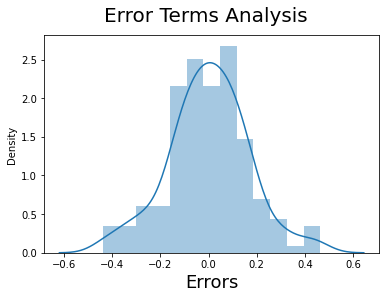

In [31]:
# Assumptions of Linear Model - 2b
# Assumption 1 - Error terms are normally distributed.

# predict in training data
y_train1_pred = model_ols_2b.predict(sm.add_constant(X_train1_rfe2))

# Plot the histogram of the error terms
fig = plt.figure()
res = y_train1_transformed - y_train1_pred
sns.distplot((res))  # , bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

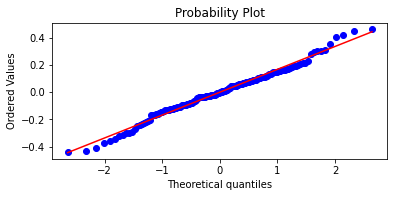

In [32]:
# Assumptions of Linear Model - 2b
# Assumption 1 - Error terms are normally distributed.Another way of confirming the same.

import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(res, plot=ax, fit=True)

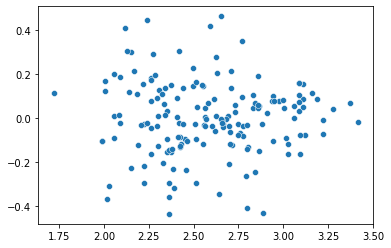

In [33]:
# Assumptions of Linear Model - 2b
# Assumption 2 - Homoscedencticity

sns.scatterplot(y_train1_pred,res)

# Interpretation
# 1- Variance of error term is almost similar. We do not see any cone/funnel type structure in the diagram. Variance of res is not a function of x. 
# Hence, Homoscedastic.

**Performance Evaluation** : Display results of inference, check R2 score and comment on overfitting / underfitting

0.7827900443663134

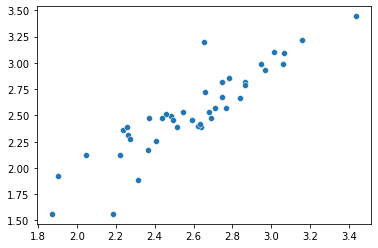

In [34]:
# TEST Predictions for selected model 2b
from sklearn.metrics import r2_score
y_test1_pred = model_ols_2b.predict(sm.add_constant(X_test1_rfe2))

# Evaluation of model
sns.scatterplot(y_test1_pred,y_test1_rfe)
r2_score(y_test1_rfe, y_test1_pred)

# Inference:
# Overfitting vs Underfitting - The model is underfit. This is because we have got around 80.3 r-sq value on train and 78.2 r-squared on test.
# We can also see from scatterplot below that there are few outliers that are not fitted properly at all. 
# The model can be improved. So, let us try cross validation.

**Model Building** : Cross Validation

In [35]:
# k-fold Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# define pipeline
steps = list()
steps.append(('transfom', PowerTransformer(method='yeo-johnson', standardize=False)))
steps.append(('scaler', StandardScaler()))
steps.append(('model', LinearRegression()))
pipeline=Pipeline(steps=steps)
# define the evaluation procedure
cv = KFold(n_splits=5,random_state=100, shuffle=True)
# evaluate the model using cross-validation
X_cv = X[["MMAX", "CACH", "CHMAX"]]
y_cv = y
scores = cross_val_score(pipeline, X_cv, y_cv, scoring='r2', cv=cv)  # , n_jobs=-1)

# report performance
print(scores)
print('r2: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

# Inference:
# 1- Cross validation shows a highly underfit model with belo 50% r2. This has not gone well and needs further exploration.

[0.39898368 0.46086516 0.45756435 0.70532426 0.36073212]
r2: 47.669 (12.031)


**Model Building** : Trying train test ratio of 1:9 and Build Model

In [36]:
# TRAIN TEST Split with training = 10%

X_train2_transformed_std, X_test2_transformed_std, y_train2_transformed_reshaped, y_train2_transformed, y_test2_transformed = preperation(0.1, X, y)

X_train2_rfe2 = X_train2_transformed_std[selected_features_2b]  # X_train1[selected_features]
X_test2_rfe2 = X_test2_transformed_std[selected_features_2b]  # X_test1[selected_features]

y_train2_reshaped_rfe = y_train2_transformed_reshaped
y_test2_rfe = y_test2_transformed

model_ols_2b = modelling_ols(X_train2_rfe2,X_test2_rfe2, y_train2_reshaped_rfe, y_test2_rfe)
get_vif(X_train2_rfe2,X_test2_rfe2,  y_train2_reshaped_rfe, y_test2_rfe)

# Inference:
# 1- Upon decreasing the train set to just 10%, the R-sq value on train data has improved. However, we expect that KPI on test will reduce.
# 3- Remove CHMAX as it has high T-stat more than 0.05. 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     29.58
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           9.20e-07
Time:                        12:42:36   Log-Likelihood:                 13.768
No. Observations:                  20   AIC:                            -19.54
Df Residuals:                      16   BIC:                            -15.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1854      0.030     71.911      0.0

In [37]:
############### Remove CHMAX as it has high P value for T statistic and rebuilding the model.

selected_features_2b.remove("CHMAX")
selected_features_2b_updated = selected_features_2b
X_train2_rfe2 = X_train2_transformed_std[selected_features_2b_updated]  
X_test2_rfe2 = X_test2_transformed_std[selected_features_2b_updated]  

y_train2_reshaped_rfe = y_train2_transformed_reshaped
y_test2_rfe = y_test2_transformed

model_ols_2b = modelling_ols(X_train2_rfe2,X_test2_rfe2, y_train2_reshaped_rfe, y_test2_rfe)
get_vif(X_train2_rfe2,X_test2_rfe2,  y_train2_reshaped_rfe, y_test2_rfe)

# Inference:
# 1- The model shows decent value of R-sq and T-stat and F-stat are under 0.05.
# 2- VIF values are under control

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     38.58
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           4.79e-07
Time:                        12:42:36   Log-Likelihood:                 12.098
No. Observations:                  20   AIC:                            -18.20
Df Residuals:                      17   BIC:                            -15.21
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1854      0.032     68.186      0.0

0.7384443863329899

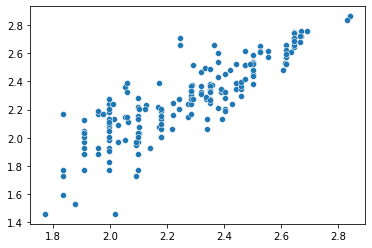

In [38]:
y_test2_pred = model_ols_2b.predict(sm.add_constant(X_test2_rfe2))

# Evaluation of model
sns.scatterplot(y_test2_pred,y_test2_rfe)
r2_score(y_test2_rfe, y_test2_pred)

# Inference
# 1- The train R2 score and test R2 score has a good difference. Test R2 score is less than train R2 score by almost 10%. 
# 2- This is an example of overfitting as there are not many data used to learn the coefficients of model.